**Upload the existing data to firebase database**

Data from existing file

In [385]:
# import os
# import time

# folder_path = './data/'  # Replace with the actual path to your folder

# data_dict = {}  # Dictionary to store data from all files

# # Iterate over each file in the folder
# for filename in os.listdir(folder_path):
#     file_path = os.path.join(folder_path, filename)  # Full path to the file
    
#     # Check if the current item is a file
#     if os.path.isfile(file_path):
#         with open(file_path, 'r') as file:
#             lines = file.readlines()  # Read all lines from the file
#             file_data = [line.strip().split(',') for line in lines]  # Convert each line to a list of values
#             data_dict[filename] = file_data  # Add the file data to the dictionary

# # Print the contents of the dictionary
# print(data_dict)


In [386]:
# first_file_data = data_dict[list(data_dict.keys())[0]]
# first_file_data[0]

Connect to Firebase realtime database

In [387]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# Fetch the service account key JSON file contents
cred = credentials.Certificate('./db_key/spacewars-49e35-firebase-adminsdk-rrf8b-24a9906067.json')
# Initialize the app with a service account, granting admin privileges
try:
    firebase_admin.initialize_app(cred, {
        'databaseURL': "https://spacewars-49e35-default-rtdb.asia-southeast1.firebasedatabase.app/"
    })
except:
    pass

ref = db.reference('/user_stat')
#print(ref.get())

- a0 = statistics.mean(A0) if len(A0) else 0
- a1 = statistics.mean(A1) if len(A1) else 0
- a2 = coin_count
- a3 = destroyed_enemy_count
- a4 = shots_count
- a5 = A4 - A3
- a6 = level
- a7 = keyX_pressed_count
- a8 = keyY_pressed_count
- a9 = respawn_enemy_count
- a10 = respawn_coin_count
- a11 = timestamp

Upload data

In [388]:
# name = ['ami','ink','peach','ploi','prince','tle']
# for i in range(6):
#     posts_ref = ref.child(name[i])
#     data = data_dict[list(data_dict.keys())[i]]
#     for d in data:
#         #timestamp = str(time.time())
#         #d.append(timestamp)
#         #print(d)
#         posts_ref.push().set(d)

Train Online Model

In [389]:
def connect_db(path):
    # Fetch the service account key JSON file contents
    cred = credentials.Certificate('./db_key/spacewars-49e35-firebase-adminsdk-rrf8b-24a9906067.json')
    try:
        # Initialize the app with a service account, granting admin privileges
        firebase_admin.initialize_app(cred, {
            'databaseURL': "https://spacewars-49e35-default-rtdb.asia-southeast1.firebasedatabase.app/"
        })
    except:
        pass
    ref = db.reference(f'/{path}')
    return ref

def high_scores_top_list():
    ref = connect_db('highscore')
    snapshot = ref.order_by_value().get()
    sorted_snapshot = sorted(snapshot.items(), key=lambda x: x[1], reverse=True)
    name = []
    score = []
    for i in sorted_snapshot:
        name.append(i[0])
        score.append(i[1])
    return(name,score)

In [390]:
def top_5():
    ref = connect_db('score')
    snapshot = ref.order_by_value().limit_to_last(5).get()
    snapshot = sorted(snapshot.items(), key=lambda x: x[1], reverse=True)

    firebase_admin.delete_app(firebase_admin.get_app())

    return snapshot

In [391]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you already have the following code:
ref = connect_db('user_stat')
snapshot = ref.get()
#scaler = StandardScaler()
# Extract the desired list for each key
data = []
for key in snapshot:
    d = snapshot[key]
    print(d)
    data.append(d)
#     for k in snapshot[key]:
#         d = snapshot[key][k]
#         d = [float(x) for x in d]
#         #d = scaler.fit_transform(np.array(d).reshape(-1, 1))
#         #d = d.tolist()  # Convert the NumPy array to a list
#         data.append(d)
len(data)
data

{'a0': '493.6024096385542', 'a1': '473.39156626506025', 'a10': '48', 'a2': '18', 'a3': '33', 'a4': '36', 'a5': '3', 'a6': '6', 'a7': '83', 'a8': '35', 'a9': '63', 'timestamp': 1687690589.501408}
{'a0': '493.6024096385542', 'a1': '473.39156626506025', 'a10': '48', 'a2': '18', 'a3': '33', 'a4': '36', 'a5': '3', 'a6': '6', 'a7': '83', 'a8': '35', 'a9': '63', 'timestamp': 1687689245.3251956}
{'a0': '473.0', 'a1': '243.21052631578948', 'a10': '22', 'a2': '12', 'a3': '0', 'a4': '0', 'a5': '0', 'a6': '2', 'a7': '12', 'a8': '19', 'a9': '10', 'timestamp': 1687689245.3251956}
{'a0': '404.5365853658537', 'a1': '389.0121951219512', 'a10': '27', 'a2': '12', 'a3': '6', 'a4': '8', 'a5': '2', 'a6': '3', 'a7': '30', 'a8': '38', 'a9': '21', 'timestamp': 1687689245.3251956}
{'a0': '496.3333333333333', 'a1': '434.41269841269843', 'a10': '41', 'a2': '16', 'a3': '17', 'a4': '22', 'a5': '5', 'a6': '5', 'a7': '47', 'a8': '30', 'a9': '41', 'timestamp': 1687689245.3251956}
{'a0': '441.8955223880597', 'a1': '447

[{'a0': '493.6024096385542',
  'a1': '473.39156626506025',
  'a10': '48',
  'a2': '18',
  'a3': '33',
  'a4': '36',
  'a5': '3',
  'a6': '6',
  'a7': '83',
  'a8': '35',
  'a9': '63',
  'timestamp': 1687690589.501408},
 {'a0': '493.6024096385542',
  'a1': '473.39156626506025',
  'a10': '48',
  'a2': '18',
  'a3': '33',
  'a4': '36',
  'a5': '3',
  'a6': '6',
  'a7': '83',
  'a8': '35',
  'a9': '63',
  'timestamp': 1687689245.3251956},
 {'a0': '473.0',
  'a1': '243.21052631578948',
  'a10': '22',
  'a2': '12',
  'a3': '0',
  'a4': '0',
  'a5': '0',
  'a6': '2',
  'a7': '12',
  'a8': '19',
  'a9': '10',
  'timestamp': 1687689245.3251956},
 {'a0': '404.5365853658537',
  'a1': '389.0121951219512',
  'a10': '27',
  'a2': '12',
  'a3': '6',
  'a4': '8',
  'a5': '2',
  'a6': '3',
  'a7': '30',
  'a8': '38',
  'a9': '21',
  'timestamp': 1687689245.3251956},
 {'a0': '496.3333333333333',
  'a1': '434.41269841269843',
  'a10': '41',
  'a2': '16',
  'a3': '17',
  'a4': '22',
  'a5': '5',
  'a6': '

In [392]:
# result = []
# for sublist in data:
#     dictionary = {int(i): value for i, value in enumerate(sublist)}
#     result.append(dictionary)

In [393]:
# result

In [394]:
# keys_to_extract = ['a2', 'a3', 'a4', 'a5', 'a6']

# result = [{k: v for k, v in d.items() if k in keys_to_extract} for d in result]

# print(result)

In [395]:
import pandas as pd
df = pd.DataFrame(data)

display(df)

,a0,a1,a10,a2,a3,a4,a5,a6,a7,a8,a9,timestamp
0,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687691e+09
1,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687689e+09
2,473.0,243.21052631578948,22,12,0,0,0,2,12,19,10,1.687689e+09
3,404.5365853658537,389.0121951219512,27,12,6,8,2,3,30,38,21,1.687689e+09
4,496.3333333333333,434.41269841269843,41,16,17,22,5,5,47,30,41,1.687689e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
423,371.07575757575756,302.6060606060606,24,9,28,29,1,3,30,22,42,1.687689e+09
424,367.20175438596493,354.780701754386,29,9,59,63,4,4,67,20,79,1.687689e+09
425,384.45,368.89166666666665,40,15,62,73,11,5,89,29,86,1.687689e+09
426,340.56,315.62,31,11,44,45,1,4,67,36,64,1.687689e+09


In [396]:
from river import preprocessing
scaler = preprocessing.StandardScaler()

In [397]:
df_train = df
display(df_train)


,a0,a1,a10,a2,a3,a4,a5,a6,a7,a8,a9,timestamp
0,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687691e+09
1,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687689e+09
2,473.0,243.21052631578948,22,12,0,0,0,2,12,19,10,1.687689e+09
3,404.5365853658537,389.0121951219512,27,12,6,8,2,3,30,38,21,1.687689e+09
4,496.3333333333333,434.41269841269843,41,16,17,22,5,5,47,30,41,1.687689e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
423,371.07575757575756,302.6060606060606,24,9,28,29,1,3,30,22,42,1.687689e+09
424,367.20175438596493,354.780701754386,29,9,59,63,4,4,67,20,79,1.687689e+09
425,384.45,368.89166666666665,40,15,62,73,11,5,89,29,86,1.687689e+09
426,340.56,315.62,31,11,44,45,1,4,67,36,64,1.687689e+09


In [398]:
# scaller_train = scaler.learn_many(df_train).transform_many(df_train)
# display(scaller_train)

In [399]:
# scaller_feature = scaller_train.loc[:, 2:6]  # Select multiple columns
# display(scaller_feature)

In [400]:
#df_feature = df_train.loc[:, ['a2','a3','a4','a5','a6']]  # Select multiple columns
df_feature = df_train.loc[:, ['a2','a3','a4','a5','a6','a7','a8','a9','a10']]  # Select multiple columns
display(df_feature)

,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,18,33,36,3,6,83,35,63,48
1,18,33,36,3,6,83,35,63,48
2,12,0,0,0,2,12,19,10,22
3,12,6,8,2,3,30,38,21,27
4,16,17,22,5,5,47,30,41,41
...,...,...,...,...,...,...,...,...,...
423,9,28,29,1,3,30,22,42,24
424,9,59,63,4,4,67,20,79,29
425,15,62,73,11,5,89,29,86,40
426,11,44,45,1,4,67,36,64,31


In [401]:
nan_counts = df_feature.isna().sum()

print(nan_counts)

a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     1
a10    1
dtype: int64


In [402]:
df_feature = df_feature.fillna(0)
nan_counts = df_feature.isna().sum()

print(nan_counts)

a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
dtype: int64


In [403]:
df_feature = df_feature.astype(int)

In [404]:
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.0003) # mean-3sd
    q_hi  = df[column_name].quantile(0.9997) # mean+3sd
    df_filtered = df[(df[column_name] <= q_hi) & (df[column_name] >= q_low)]
    return df_filtered

# df =  filter_outliner(df, 'units')

for i in list(df_feature.columns):
    df_feature =  filter_outliner(df_feature, i)

In [405]:
df_feature.describe()

,a2,a3,a4,a5,a6,a7,a8,a9,a10
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,10.761337,30.873508,37.937947,7.064439,3.704057,48.269690,22.832936,49.274463,29.276850
std,7.539709,30.015080,37.399383,9.952911,1.519650,30.081092,25.115823,35.999516,12.813895
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,5.000000
25%,4.500000,2.000000,3.000000,0.000000,3.000000,27.000000,4.000000,20.000000,20.000000
50%,9.000000,23.000000,30.000000,4.000000,4.000000,43.000000,15.000000,40.000000,29.000000
75%,16.000000,50.500000,60.500000,10.000000,5.000000,66.000000,33.000000,74.000000,38.000000
max,35.000000,139.000000,189.000000,64.000000,7.000000,140.000000,113.000000,174.000000,65.000000


In [406]:
from river import cluster
from river import naive_bayes
from river import stream


# Clustering with STREAMKMeans
streamkmeans = cluster.STREAMKMeans(n_clusters=4, seed=0)

# Online Clustering
for x,_ in stream.iter_pandas(df_feature):
    print(x)
    streamkmeans = streamkmeans.learn_one(x)


{'a2': 18, 'a3': 33, 'a4': 36, 'a5': 3, 'a6': 6, 'a7': 83, 'a8': 35, 'a9': 63, 'a10': 48}
{'a2': 18, 'a3': 33, 'a4': 36, 'a5': 3, 'a6': 6, 'a7': 83, 'a8': 35, 'a9': 63, 'a10': 48}
{'a2': 12, 'a3': 0, 'a4': 0, 'a5': 0, 'a6': 2, 'a7': 12, 'a8': 19, 'a9': 10, 'a10': 22}
{'a2': 12, 'a3': 6, 'a4': 8, 'a5': 2, 'a6': 3, 'a7': 30, 'a8': 38, 'a9': 21, 'a10': 27}
{'a2': 16, 'a3': 17, 'a4': 22, 'a5': 5, 'a6': 5, 'a7': 47, 'a8': 30, 'a9': 41, 'a10': 41}
{'a2': 17, 'a3': 17, 'a4': 19, 'a5': 2, 'a6': 5, 'a7': 61, 'a8': 46, 'a9': 41, 'a10': 42}
{'a2': 17, 'a3': 19, 'a4': 20, 'a5': 1, 'a6': 5, 'a7': 60, 'a8': 38, 'a9': 43, 'a10': 42}
{'a2': 21, 'a3': 30, 'a4': 31, 'a5': 1, 'a6': 6, 'a7': 78, 'a8': 50, 'a9': 60, 'a10': 51}
{'a2': 14, 'a3': 6, 'a4': 7, 'a5': 1, 'a6': 4, 'a7': 40, 'a8': 51, 'a9': 26, 'a10': 34}
{'a2': 11, 'a3': 1, 'a4': 1, 'a5': 0, 'a6': 2, 'a7': 16, 'a8': 20, 'a9': 11, 'a10': 21}
{'a2': 18, 'a3': 8, 'a4': 8, 'a5': 0, 'a6': 4, 'a7': 47, 'a8': 43, 'a9': 28, 'a10': 38}
{'a2': 11, 'a3': 1, 

In [407]:
y = [streamkmeans.predict_one(x) for x,_ in stream.iter_pandas(df_feature)]
# for x, _ in stream.iter_pandas(scaller_train):
#     cluster = clustream.predict_one(x)
print(y)
print(len(y))

[0, 0, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 2, 3, 1, 0, 3, 1, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 2, 2, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2, 3, 0, 2, 2, 3, 2, 0, 3, 3, 0, 3, 0, 3, 2, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 0, 3, 2, 3, 0, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 3, 0, 3, 2, 3, 3, 3, 3, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 2, 0, 3, 1, 0, 0, 0, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 2, 2, 3, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 1, 1, 0, 2, 0, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 0, 2, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2, 0, 0, 2, 3, 3, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 2, 0, 1, 3, 2, 0, 1, 1, 0, 3, 1, 3, 1, 2, 1, 1, 

In [408]:
from collections import Counter
# Count the occurrences of each value in the list
counts = Counter(y)
# Print the counts
print('Streamkmeans')
for value, count in counts.items():
    print(f"{value} = {count}")

Streamkmeans
0 = 124
2 = 59
3 = 188
1 = 48


In [409]:
df_feature['Y'] = y

In [410]:
display(df_feature)

,a2,a3,a4,a5,a6,a7,a8,a9,a10,Y
0,18,33,36,3,6,83,35,63,48,0
1,18,33,36,3,6,83,35,63,48,0
2,12,0,0,0,2,12,19,10,22,2
3,12,6,8,2,3,30,38,21,27,3
4,16,17,22,5,5,47,30,41,41,3
...,...,...,...,...,...,...,...,...,...,...
423,9,28,29,1,3,30,22,42,24,3
424,9,59,63,4,4,67,20,79,29,0
425,15,62,73,11,5,89,29,86,40,0
426,11,44,45,1,4,67,36,64,31,0


In [411]:
mean_collected_coin = df_feature.groupby(['Y']).mean()['a2']
mean_enemies_kills = df_feature.groupby(['Y']).mean()['a3']
print(mean_collected_coin)
print(mean_enemies_kills)

Y
0    10.153226
1    15.645833
2     4.067797
3    12.015957
Name: a2, dtype: float64
Y
0    50.016129
1    87.708333
2     1.661017
3    12.904255
Name: a3, dtype: float64


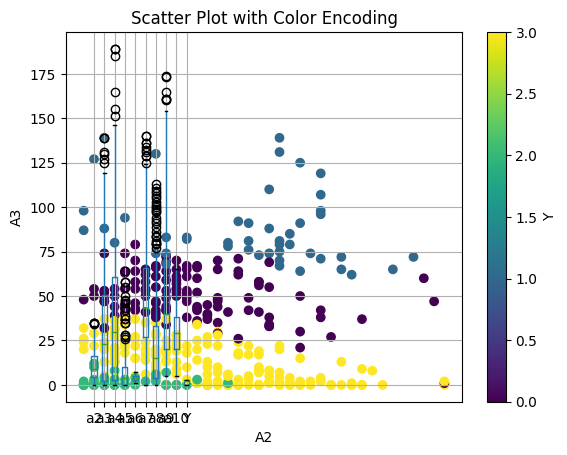

In [412]:
import matplotlib.pyplot as plt
# Create box plots for each column
df_feature.boxplot()

# Create a scatter plot with color encoding
plt.scatter(df_feature['a2'], df_feature['a3'], c=df_feature['Y'])

# Set labels and title
plt.xlabel('A2')
plt.ylabel('A3')
plt.title('Scatter Plot with Color Encoding')

# Show the plot
plt.colorbar(label='Y')
plt.show()

In [413]:
labels = []
num_labels = len(mean_collected_coin)
for i in range(num_labels):
    if i % 2 == 0:
        sorted_index = np.argsort(mean_collected_coin)
    else:
        sorted_index = np.argsort(mean_enemies_kills)

    sorted_index = list(sorted_index)
    sorted_index.reverse()
    for max_index in sorted_index:
        if max_index not in labels:
            labels.append(max_index)
            break

print(labels)

LABELS = {
    labels[0]: 'Hardcore Achiever',
    labels[1]: 'Hardcore Killer',
    labels[2]: 'Casual Achiever',
    labels[3]: 'Casual Killer',
}
print(LABELS)

[1, 0, 3, 2]
{1: 'Hardcore Achiever', 0: 'Hardcore Killer', 3: 'Casual Achiever', 2: 'Casual Killer'}


In [414]:
df_feature['Y'] = df_feature['Y'].map(LABELS)
display(df_feature)


,a2,a3,a4,a5,a6,a7,a8,a9,a10,Y
0,18,33,36,3,6,83,35,63,48,Hardcore Killer
1,18,33,36,3,6,83,35,63,48,Hardcore Killer
2,12,0,0,0,2,12,19,10,22,Casual Killer
3,12,6,8,2,3,30,38,21,27,Casual Achiever
4,16,17,22,5,5,47,30,41,41,Casual Achiever
...,...,...,...,...,...,...,...,...,...,...
423,9,28,29,1,3,30,22,42,24,Casual Achiever
424,9,59,63,4,4,67,20,79,29,Hardcore Killer
425,15,62,73,11,5,89,29,86,40,Hardcore Killer
426,11,44,45,1,4,67,36,64,31,Hardcore Killer


In [415]:
df_feature

,a2,a3,a4,a5,a6,a7,a8,a9,a10,Y
0,18,33,36,3,6,83,35,63,48,Hardcore Killer
1,18,33,36,3,6,83,35,63,48,Hardcore Killer
2,12,0,0,0,2,12,19,10,22,Casual Killer
3,12,6,8,2,3,30,38,21,27,Casual Achiever
4,16,17,22,5,5,47,30,41,41,Casual Achiever
...,...,...,...,...,...,...,...,...,...,...
423,9,28,29,1,3,30,22,42,24,Casual Achiever
424,9,59,63,4,4,67,20,79,29,Hardcore Killer
425,15,62,73,11,5,89,29,86,40,Hardcore Killer
426,11,44,45,1,4,67,36,64,31,Hardcore Killer


In [416]:
df_feature.loc[df_feature['Y'] == 'Casual Killer']

,a2,a3,a4,a5,a6,a7,a8,a9,a10,Y
2,12,0,0,0,2,12,19,10,22,Casual Killer
18,3,0,0,0,1,4,2,5,8,Casual Killer
25,1,12,16,4,2,16,0,22,11,Casual Killer
55,0,0,0,0,1,0,0,5,5,Casual Killer
57,0,0,0,0,1,0,0,5,5,Casual Killer
67,2,0,0,0,1,6,4,5,7,Casual Killer
70,2,0,0,0,1,7,4,5,7,Casual Killer
71,8,0,0,0,2,16,9,10,18,Casual Killer
73,3,8,9,1,2,17,1,18,13,Casual Killer
81,3,3,4,1,1,8,1,8,8,Casual Killer


In [417]:
df_for_clf = df_feature

y = df_for_clf.pop('Y')

display(df_for_clf)

,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,18,33,36,3,6,83,35,63,48
1,18,33,36,3,6,83,35,63,48
2,12,0,0,0,2,12,19,10,22
3,12,6,8,2,3,30,38,21,27
4,16,17,22,5,5,47,30,41,41
...,...,...,...,...,...,...,...,...,...
423,9,28,29,1,3,30,22,42,24
424,9,59,63,4,4,67,20,79,29
425,15,62,73,11,5,89,29,86,40
426,11,44,45,1,4,67,36,64,31


In [418]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_for_clf, y, test_size=0.30, random_state=42)

In [419]:
# # Classification with MultinomialNB
# classifier = naive_bayes.MultinomialNB()

# for xi, yi in stream.iter_pandas(df_for_clf, y):
#     print(xi)
#     print(yi)
#     classifier = classifier.learn_one(xi,yi)

In [420]:
# for xi, _ in stream.iter_pandas(df_for_clf):
#     print(clf.predict_one(xi))

In [421]:
# y = [classifier.predict_proba_one(x) for x,_ in stream.iter_pandas(df_for_clf)]
# print(y)

In [422]:
# # Count the occurrences of each value in the list
# counts = Counter(y)
# # Print the counts
# print('Classifier')
# for value, count in counts.items():
#     print(f"{value} = {count}")

In [423]:
from river import evaluate
from river import metrics
from river import tree

model = tree.ExtremelyFastDecisionTreeClassifier(
    grace_period=100,
    max_depth=4,
    split_criterion='gini',
    leaf_prediction='nba',
    )

for xi, yi in stream.iter_pandas(X_train, y_train):
    clf = model.learn_one(xi,yi)

In [424]:
from river import metrics
from river import evaluate

metric = metrics.Accuracy()

print(evaluate.progressive_val_score(stream.iter_pandas(X_test, y_test), clf, metric))

Accuracy: 90.48%



(dot.exe:9508): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


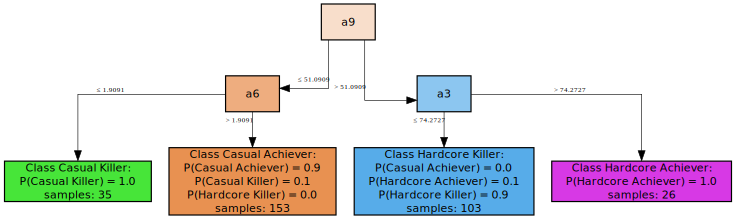

In [425]:
clf.draw()

In [426]:
new_data = {
    2: 11,
    3: 91,
    4: 100,
    5: 9,
    6: 6
}

In [427]:
#new_data = {i: value for i, value in enumerate(new_data)}
print(new_data)

{2: 11, 3: 91, 4: 100, 5: 9, 6: 6}


In [428]:
prediction_cluster = streamkmeans.predict_one(new_data)
print(prediction_cluster)
prediction_classify = clf.predict_one(new_data)
print(prediction_classify)

2
Casual Achiever


In [429]:
import pickle

# Save the clustering model
with open('./model/streamkmeans_model.pkl', 'wb') as f:
     pickle.dump(streamkmeans, f)

# Save the classification model
with open('./model/treeclassifier_model.pkl', 'wb') as f:
     pickle.dump(clf, f)